<a href="https://colab.research.google.com/github/zidanardany/ai-mastery/blob/main/Image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab.patches import cv2_imshow

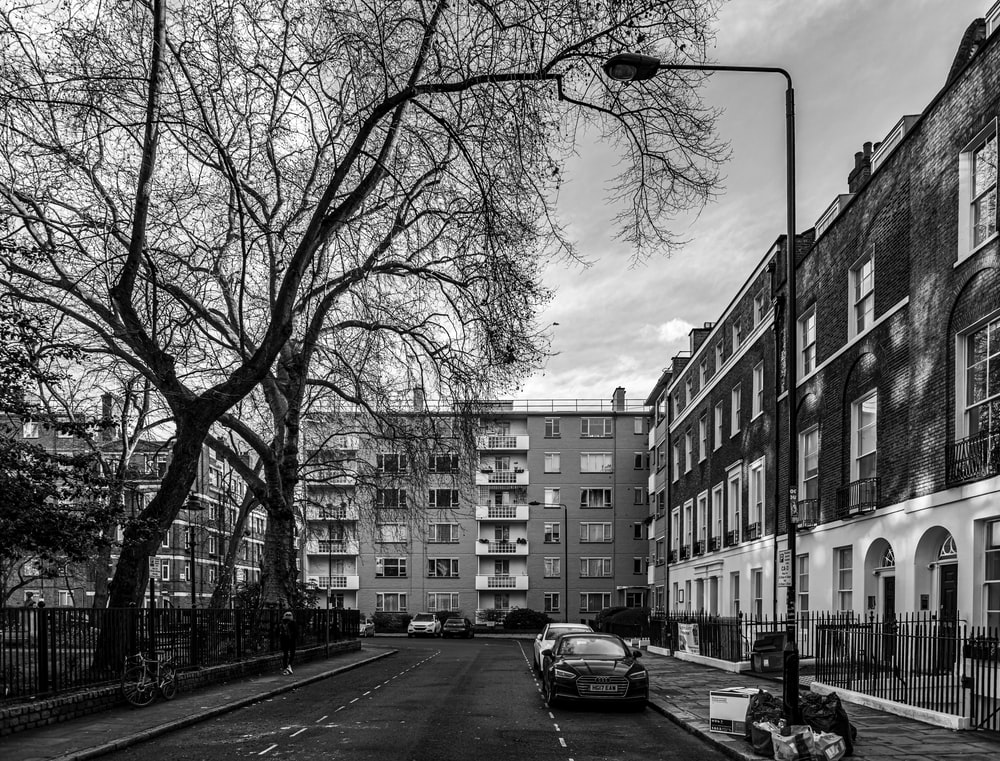

In [ ]:
img = cv2.imread('street.jpg')

# enhance image dalam grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

**Brightness vs Contrast**

In [ ]:
alpha = 2   # contrast control
beta = 0  # brightness control

new_image = np.zeros(img_gray.shape, img_gray.dtype)

for y in range(img_gray.shape[0]):
    for x in range(img_gray.shape[1]):

        # mengubah contrast dg mengalikan, mengubah brightness dengan menjumlahkan
        new_image[y,x] = np.clip(alpha*img_gray[y,x] + beta, 0, 255)

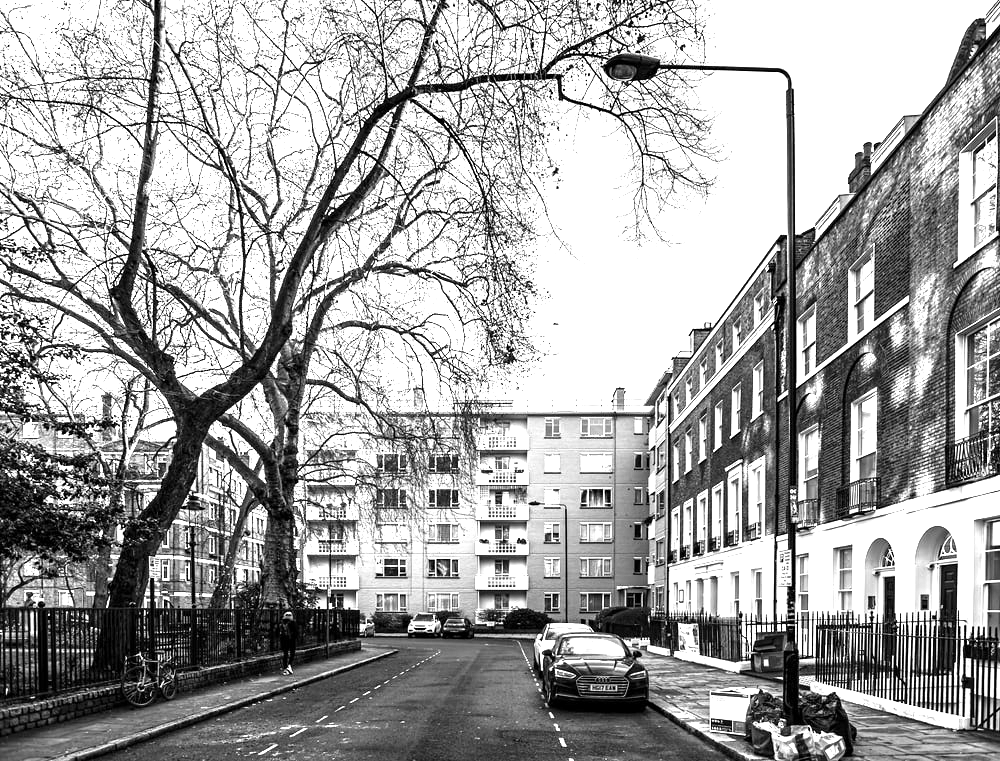

In [ ]:
cv2_imshow(new_image)

In [ ]:
alpha = 2   # contrast control
beta = 100  # brightness control

new_image = np.zeros(img_gray.shape, img_gray.dtype)

for y in range(img_gray.shape[0]):
    for x in range(img_gray.shape[1]):

        # mengubah contrast dg mengalikan sebuah nilai ke setiap intensitas piksel, 
        # mengubah brightness dg menjumlahkan sebuah nilai ke setiap intensitas piksel
        new_image[y,x] = np.clip(alpha*img_gray[y,x] + beta, 0, 255)

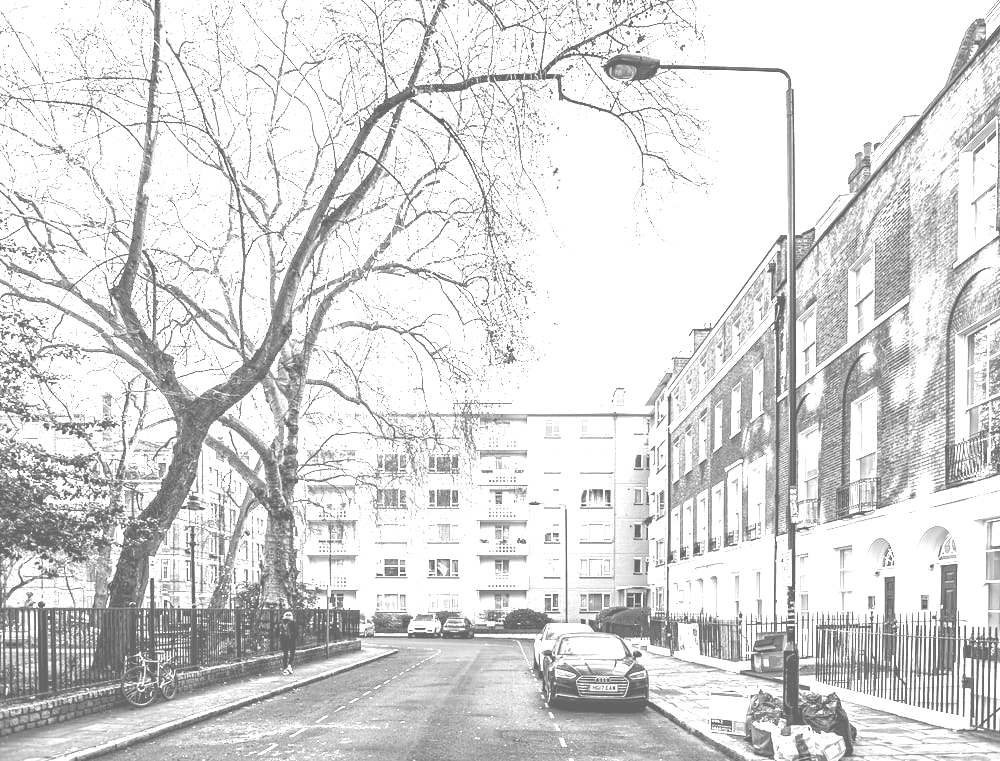

In [ ]:
cv2_imshow(new_image)

transformation dan gamma correction akan mengcombine perbaikan brightness dan contrast agar citra lebih sempurna

**Log Transformation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


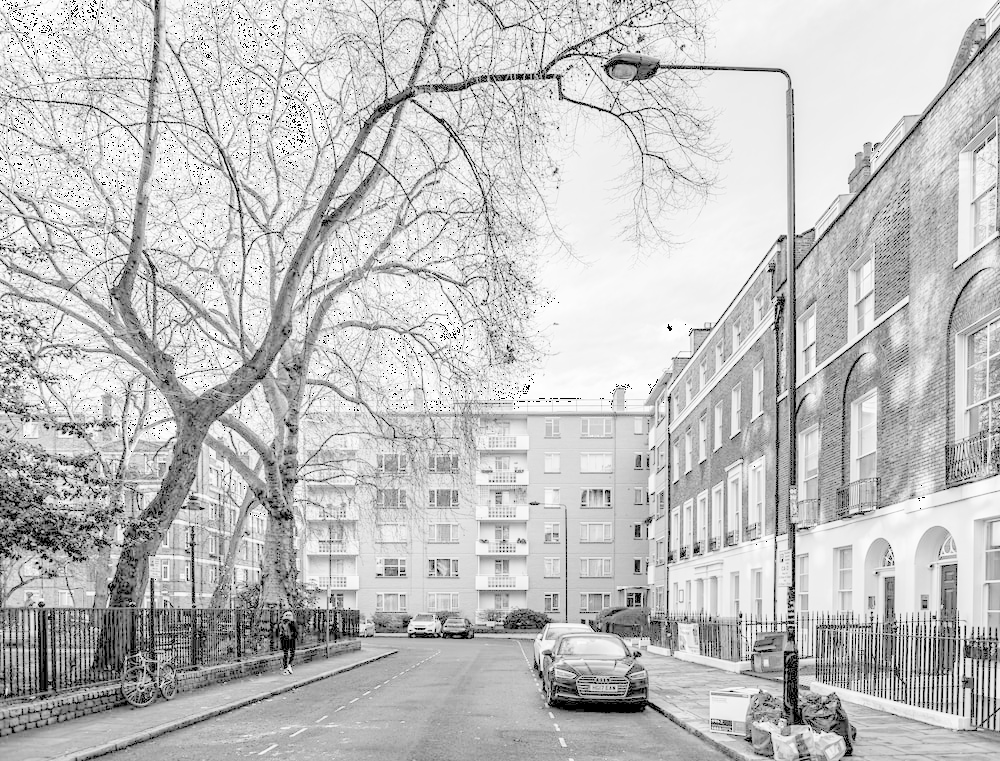

In [ ]:
c = 255/np.log(1 + np.max(img_gray))
img_log = c * np.log(1 + img_gray)

cv2_imshow(img_log)

**Gamma correction**

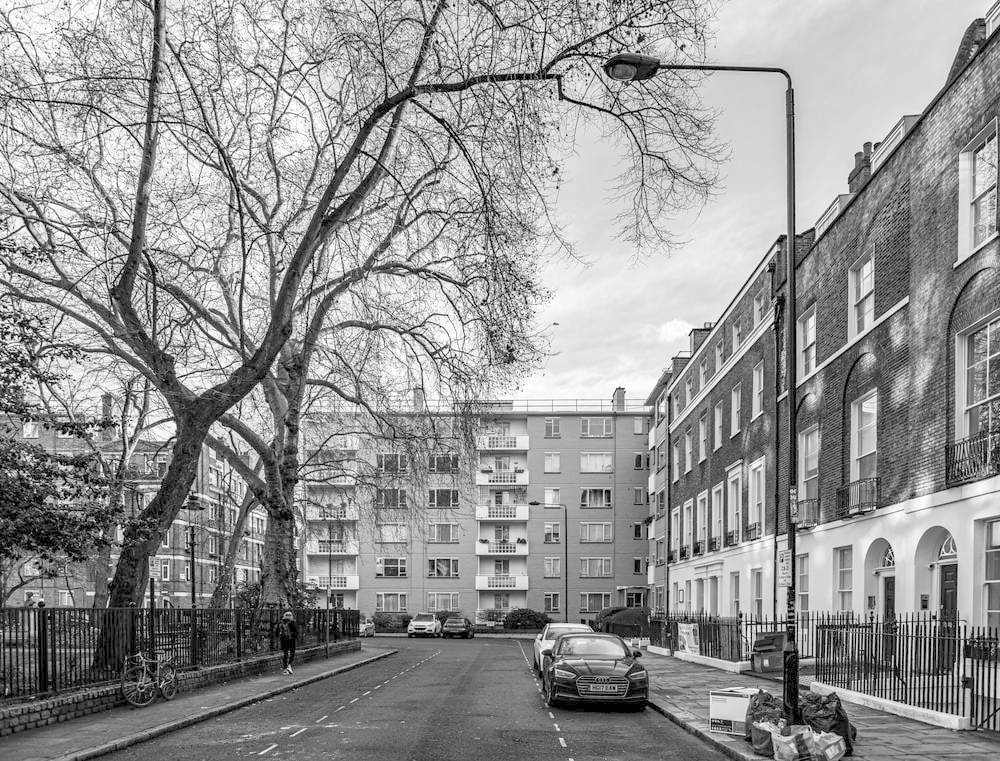

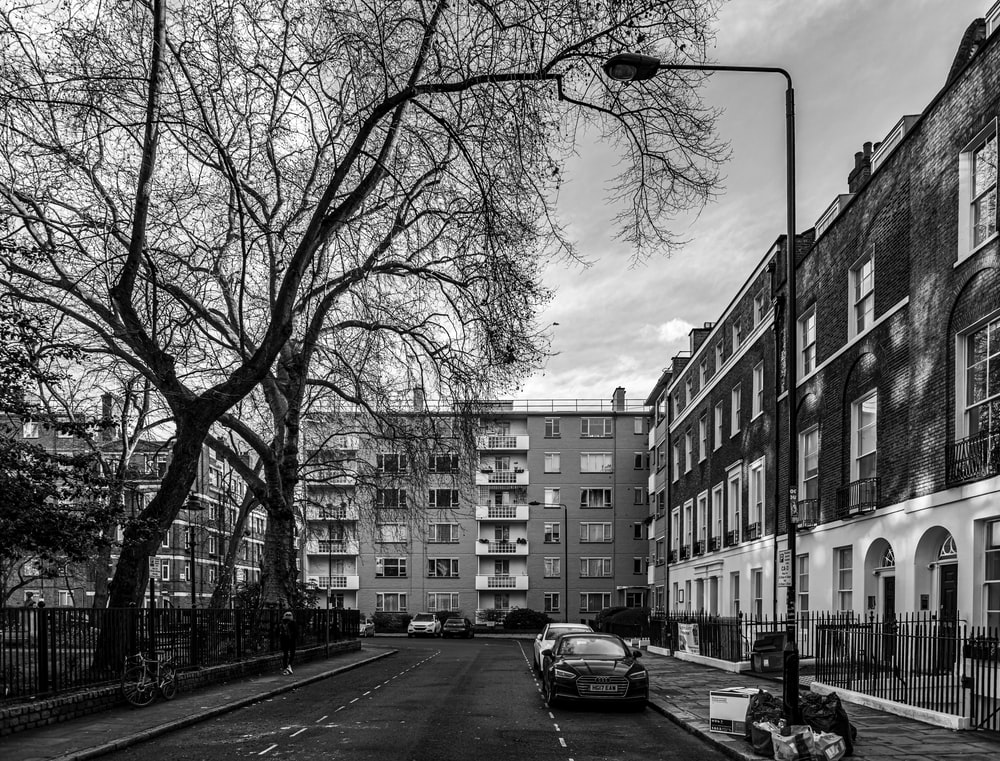

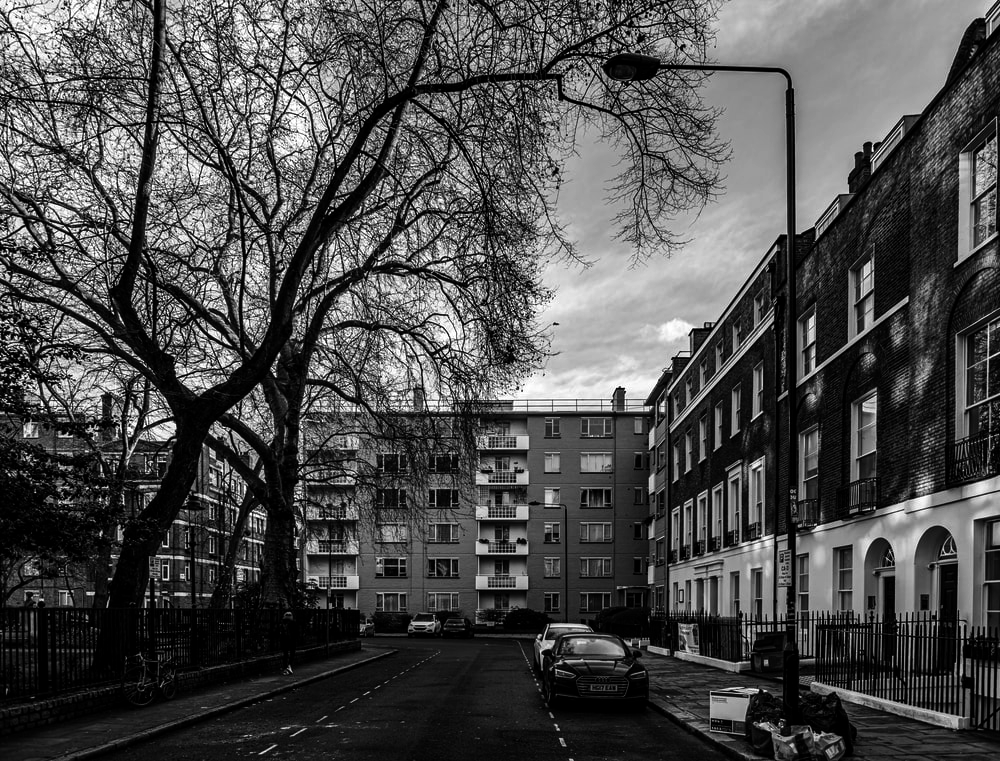

In [ ]:
for gamma in [0.5, 1, 1.5]:
  gamma_img = np.array(255*(img_gray/255) ** gamma, dtype='uint8') # seharusnya 1/gamma, tapi untuk mempermudah perhitungan langsung ditulis di list

  cv2_imshow(gamma_img)

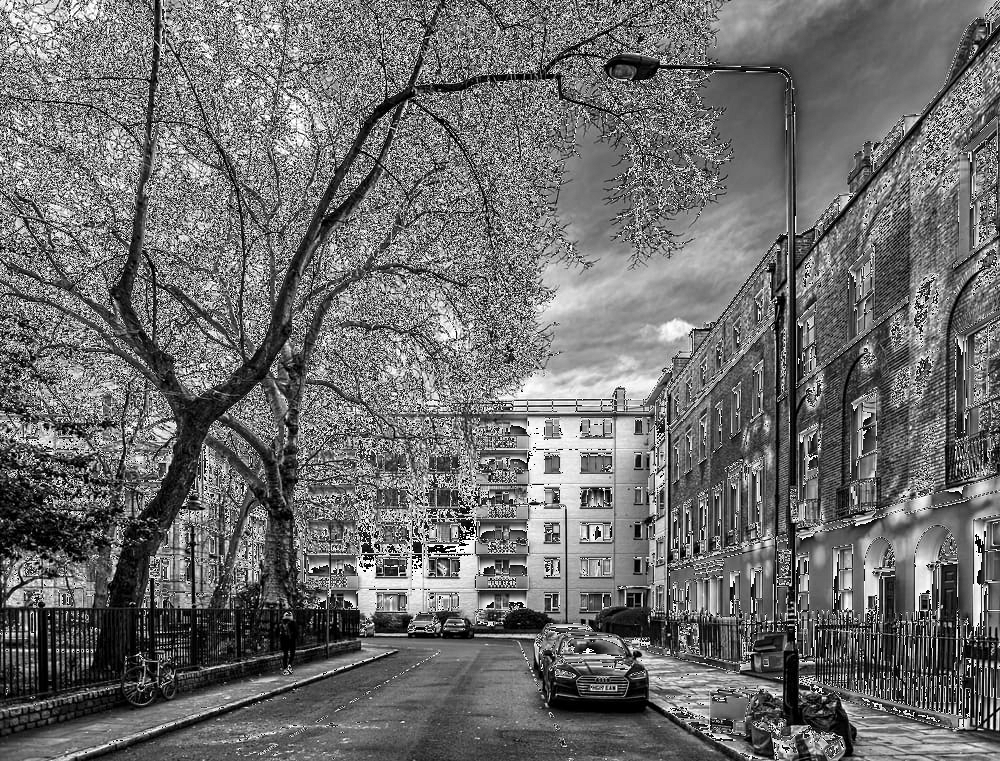

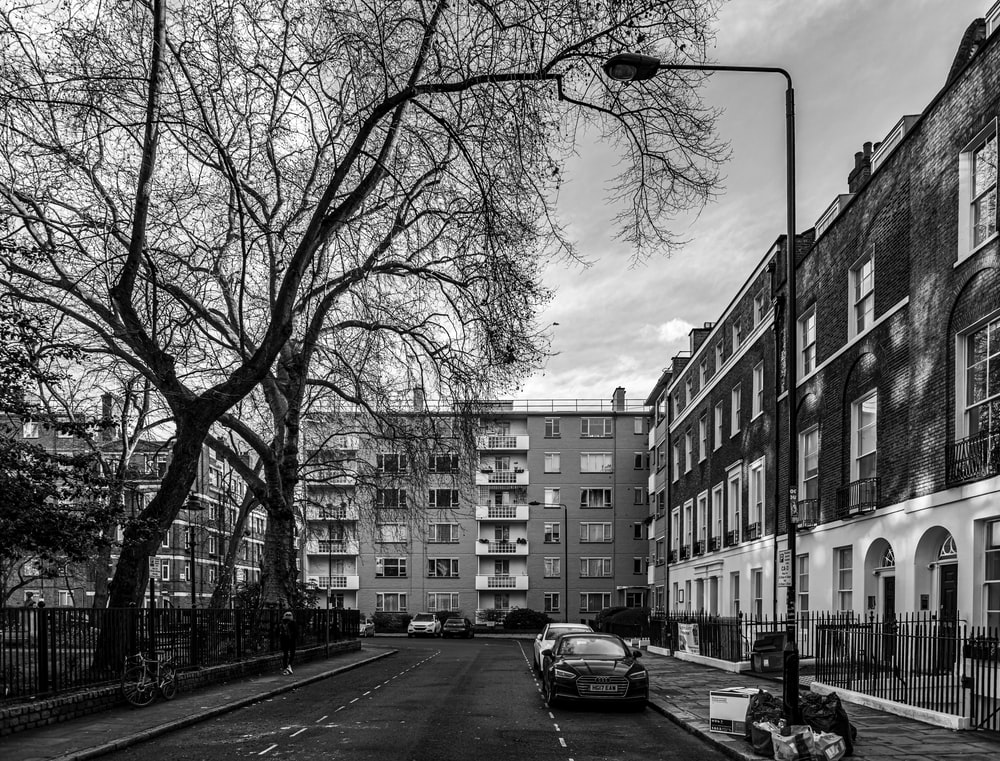

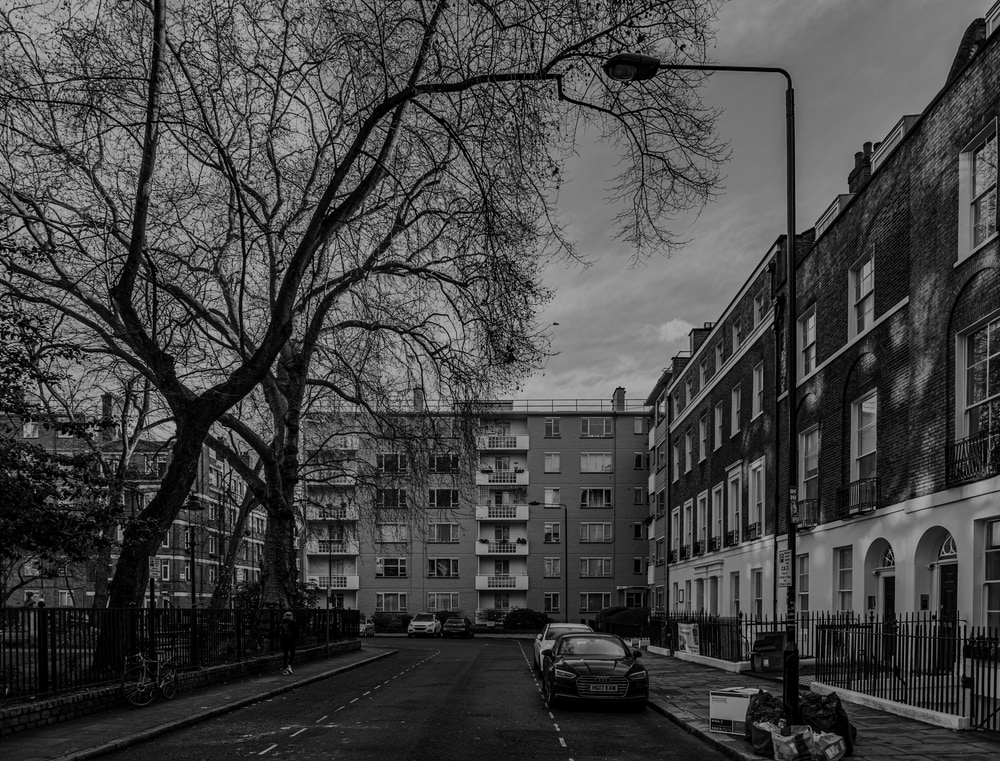

In [ ]:
for gamma in [0.5, 1, 1.5]:
  gamma_img = np.array(255*(img_gray/255) ** 1/gamma, dtype='uint8') # seharusnya 1/gamma, tapi untuk mempermudah perhitungan langsung ditulis di list

  cv2_imshow(gamma_img)

**Histogram equalization**

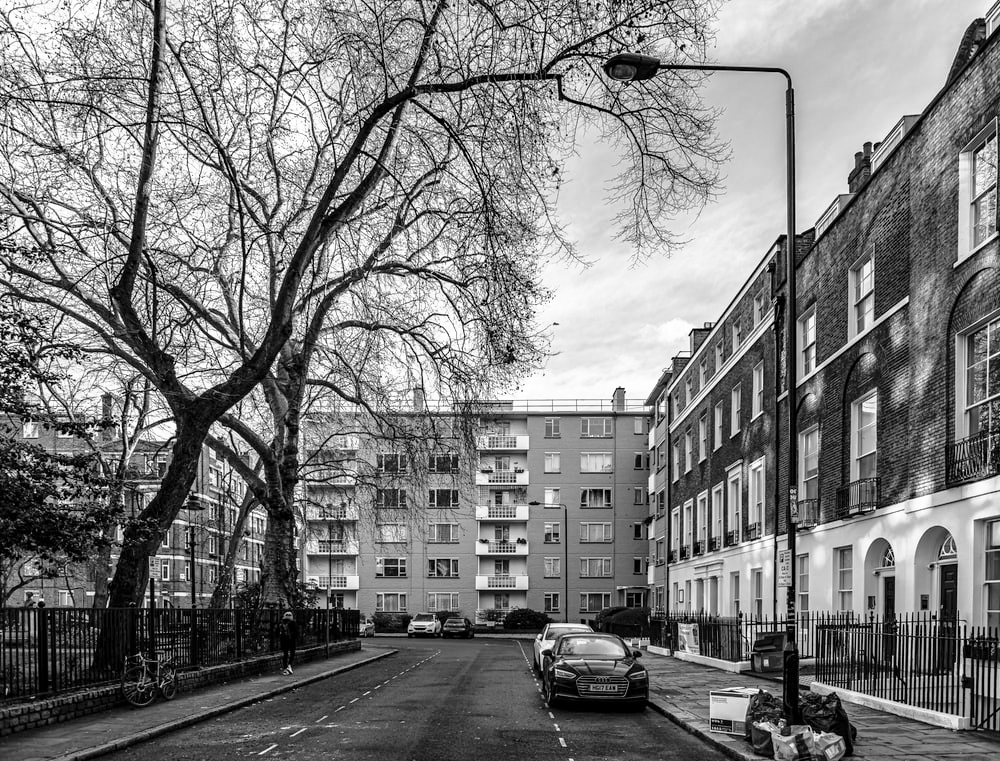

In [ ]:
equ_hist = cv2.equalizeHist(img_gray)

cv2_imshow(equ_hist)

Perbandingan hasil awal dengan histogram equalization

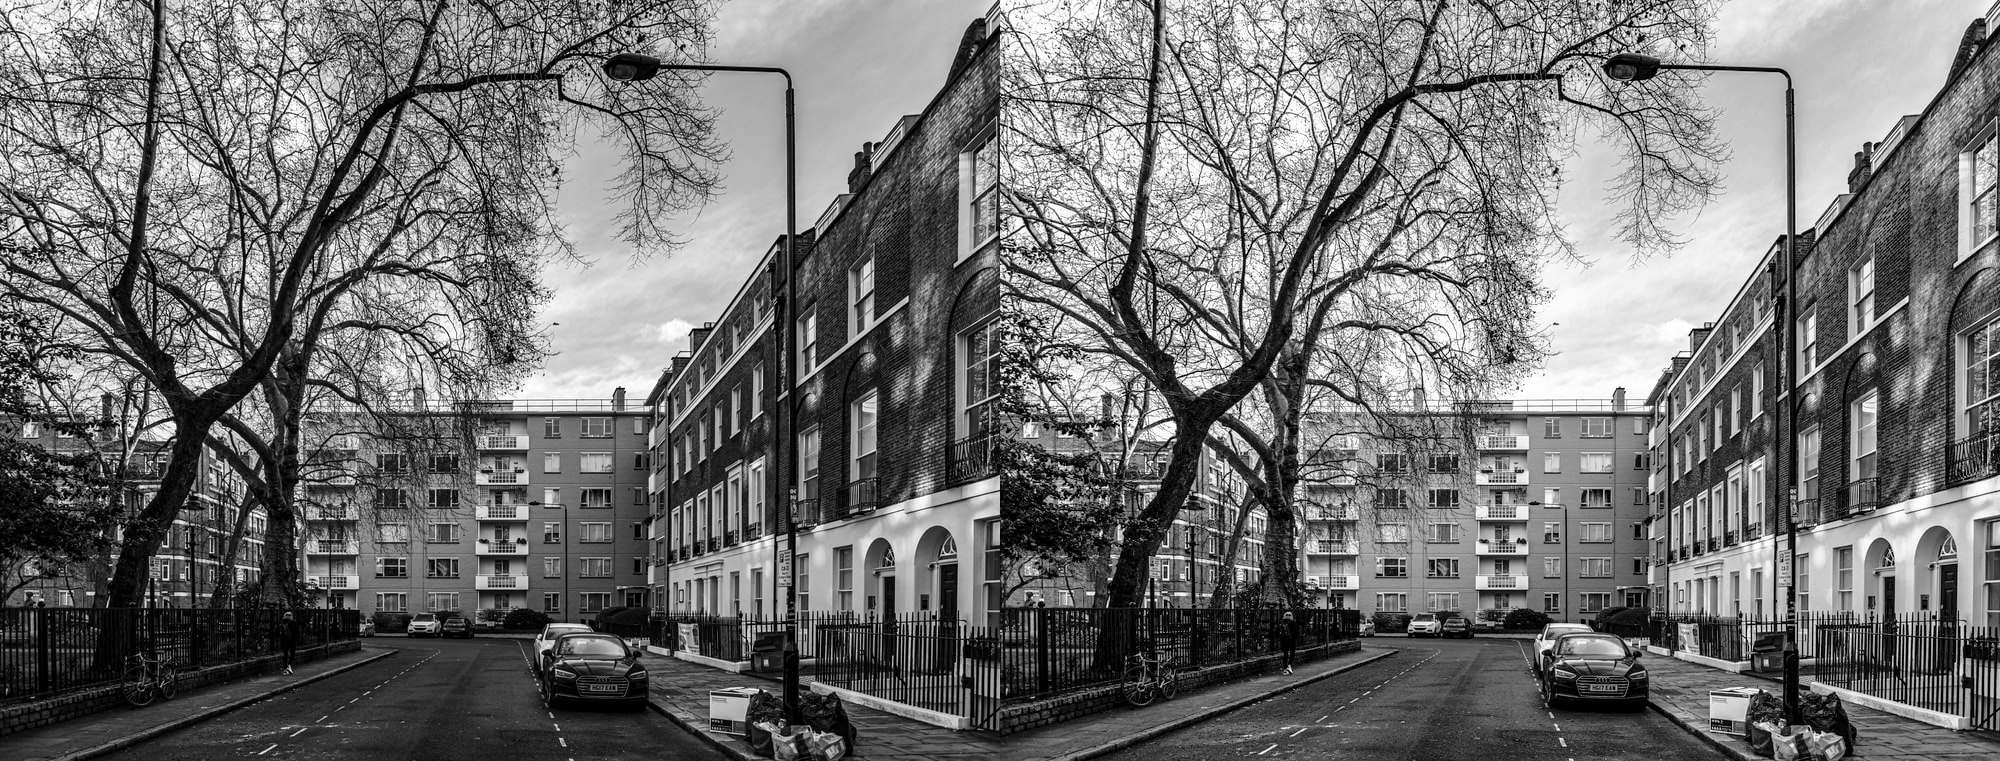

In [ ]:
res = np.hstack((img_gray, equ_hist))
cv2_imshow(res)

Terlihat bahwa beberapa method tidak memiliki impact pada citra. Kita bisa melakukan eksperimen untuk menentukan method mana yang memiliki impact yang kita inginkan. Kalau di project ini kita bisa gunakan gamma correction 1.5